In [25]:
import sys
sys.path.append('')
import json
import requests
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
from pprint import pprint
#from config import weather
from datetime import datetime, timezone, timedelta
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
import scipy.stats as scp
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.stats import expon

In [26]:
data = pd.read_excel('Tornado_Data_2009to2015_byMag.xlsx')

In [27]:

test = data
#test = data.iloc[25:51]
mean = test.groupby('Magnitude').mean()
mean = mean.reset_index()

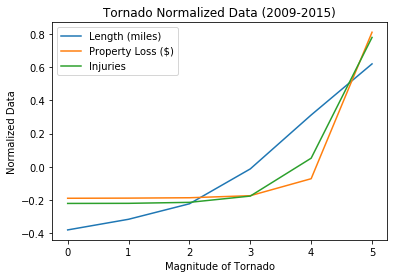

In [28]:
length_norm = (mean['Length (miles)'] - mean['Length (miles)'].mean()) / (mean['Length (miles)'].max() 
                                                                          - mean['Length (miles)'].min())
prop_norm = (mean['Property Loss ($)'] - mean['Property Loss ($)'].mean()) / (mean['Property Loss ($)'].max() 
                                                                          - mean['Property Loss ($)'].min())
inj_norm = (mean['Injuries'] - mean['Injuries'].mean()) / (mean['Injuries'].max() 
                                                                          - mean['Injuries'].min())
plt.plot(mean['Magnitude'],length_norm)
plt.plot(mean['Magnitude'],prop_norm)
plt.plot(mean['Magnitude'],inj_norm)
plt.legend()
plt.title('Tornado Normalized Data (2009-2015)')
plt.xlabel('Magnitude of Tornado')
plt.ylabel('Normalized Data')
plt.show()

In [29]:
def func(x, a, b):
    return a * np.exp(b * x)

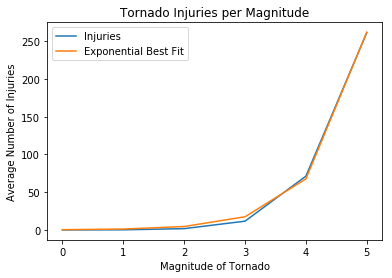

Equation of best fit: y = 0.3002*e^1.3544x


In [30]:
mean = test.groupby('Magnitude').mean()
mean = mean.reset_index()

plt.plot(mean['Magnitude'],mean['Injuries'])

xdata = mean['Magnitude']
ydata = mean['Injuries']
popt, pcov = curve_fit(func, xdata, ydata)

#plt.plot(x, func(x, *popt), label="Fitted Curve")
var = []
for i in range(0,6):
    g=popt[0]*np.exp(popt[1]*i)
  #  if g < 0:
   #     g = 0.1
    var.append(g)
plt.plot(mean['Magnitude'],var,label='Exponential Best Fit')
plt.legend()
plt.title('Tornado Injuries per Magnitude')
plt.xlabel('Magnitude of Tornado')
plt.ylabel('Average Number of Injuries')
plt.show()
print('Equation of best fit: y = ' + str(round(popt[0],4)) + '*e^' + str(round(popt[1],4)) + 'x')

In [31]:
expected_injuries = pd.DataFrame({'Expected':var})
observed_injuries = pd.DataFrame({'Observed':mean['Injuries']})
injuries = pd.DataFrame()
injuries['Observed']= observed_injuries['Observed']
injuries['Expected']= expected_injuries['Expected']
injuries


,Observed,Expected
0,0.020381,0.300183
1,0.170655,1.163036
2,1.702247,4.506093
3,11.608247,17.458503
4,71.296296,67.641598
5,261.571429,262.072055


In [32]:
critical_value = stats.chi2.ppf(q = 0.95, df = 5)
critical_value

11.070497693516351

In [33]:
q = stats.chisquare(injuries['Observed'], injuries['Expected'])
if q[0] > critical_value:
    print('Statistic: ' + str(q[0]) + '\nP-Value: ' + str(q[1]) + '\nCritical Value: ' + str(critical_value) +
          '\nReject null hypothesis because statistic is larger than the critical value.')
else:
    print('Statistic: ' + str(q[0]) + '\nP-Value: ' + str(q[1]) + '\nCritical Value: ' + str(critical_value) +
    '\nFail to reject null hypothesis because statistic is smaller than the critical value.')

Statistic: 5.011032477292838
P-Value: 0.4145352526599477
Critical Value: 11.070497693516351
Fail to reject null hypothesis because statistic is smaller than the critical value.


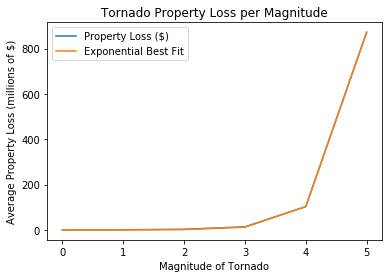

Equation of best fit: y = 0.0202*e^2.1348x


In [34]:
plt.plot(mean['Magnitude'],mean['Property Loss ($)'])

xdata = mean['Magnitude']
ydata = mean['Property Loss ($)']
popt1, pcov = curve_fit(func, xdata, ydata)

#plt.plot(x, func(x, *popt), label="Fitted Curve")
var1 = []
for i in range(0,6):
    g=popt1[0]*np.exp(popt1[1]*i)
  #  if g < 0:
   #     g = 0.1
    var1.append(g)
plt.plot(mean['Magnitude'],var1,label='Exponential Best Fit')
plt.legend()
plt.title('Tornado Property Loss per Magnitude')
plt.xlabel('Magnitude of Tornado')
plt.ylabel('Average Property Loss (millions of $)')
plt.show()
print('Equation of best fit: y = ' + str(round(popt1[0],4)) + '*e^' + str(round(popt1[1],4)) + 'x')

In [35]:
expected_prop = pd.DataFrame({'Expected':var1})
observed_prop = pd.DataFrame({'Observed':mean['Property Loss ($)']})
property_loss = pd.DataFrame()
property_loss['Observed']= observed_prop['Observed']
property_loss['Expected']= expected_prop['Expected']
property_loss

,Observed,Expected
0,0.018327,0.020177
1,0.790588,0.170609
2,2.772346,1.442621
3,13.521237,12.198368
4,102.772963,103.145751
5,872.192857,872.169593


In [36]:
critical_value = stats.chi2.ppf(q = 0.95, df = 5)
critical_value

11.070497693516351

In [37]:
q = stats.chisquare(injuries['Observed'], injuries['Expected'])
if q[0] > critical_value:
    print('Statistic: ' + str(q[0]) + '\nP-Value: ' + str(q[1]) + '\nCritical Value: ' + str(critical_value) +
          '\nReject null hypothesis because statistic is larger than the critical value.')
else:
    print('Statistic: ' + str(q[0]) + '\nP-Value: ' + str(q[1]) + '\nCritical Value: ' + str(critical_value) +
    '\nFail to reject null hypothesis because statistic is smaller than the critical value.')

Statistic: 5.011032477292838
P-Value: 0.4145352526599477
Critical Value: 11.070497693516351
Fail to reject null hypothesis because statistic is smaller than the critical value.


In [38]:
def func1(x, a, b):
    return ax + b

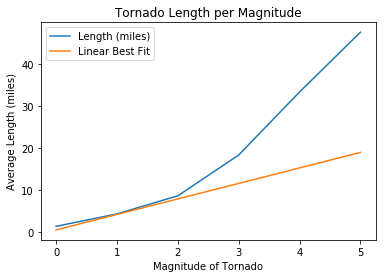

Equation of best fit: y = 3.6838*x + 0.519


In [39]:
plt.plot(mean['Magnitude'],mean['Length (miles)'])

xdata = mean['Magnitude']
ydata = mean['Length (miles)']
popt2, pcov = curve_fit(func, xdata, ydata)

#plt.plot(x, func(x, *popt), label="Fitted Curve")
var2 = []
for i in range(0,6):
    g=popt2[0]*i + popt2[1]
  #  if g < 0:
   #     g = 0.1
    var2.append(g)
plt.plot(mean['Magnitude'],var2,label='Linear Best Fit')
plt.legend()
plt.title('Tornado Length per Magnitude')
plt.xlabel('Magnitude of Tornado')
plt.ylabel('Average Length (miles)')
plt.show()
print('Equation of best fit: y = 3.6838*x + 0.519')

In [40]:
expected_length = pd.DataFrame({'Expected':var2})
observed_length = pd.DataFrame({'Observed':mean['Length (miles)']})
length = pd.DataFrame()
length['Observed']= observed_length['Observed']
length['Expected']= expected_length['Expected']
length

,Observed,Expected
0,1.360408,0.519050
1,4.318160,4.202895
2,8.620913,7.886740
3,18.319742,11.570586
4,33.304815,15.254431
5,47.511429,18.938276


In [41]:
critical_value = stats.chi2.ppf(q = 0.95, df = 5)
critical_value

11.070497693516351

In [42]:
q = stats.chisquare(length['Observed'], length['Expected'])
if q[0] > critical_value:
    print('Statistic: ' + str(q[0]) + '\nP-Value: ' + str(q[1]) + '\nCritical Value: ' + str(critical_value) +
          '\nReject null hypothesis because statistic is larger than the critical value.')
else:
    print('Statistic: ' + str(q[0]) + '\nP-Value: ' + str(q[1]) + '\nCritical Value: ' + str(critical_value) +
    '\nFail to reject null hypothesis because statistic is smaller than the critical value.')

Statistic: 69.8406996837904
P-Value: 1.106074751037805e-13
Critical Value: 11.070497693516351
Reject null hypothesis because statistic is larger than the critical value.
